In [2]:
import dash
import plotly.express as px
import pandas as pd
import random

In [3]:
app_responsiveness = pd.read_csv('App Responsiveness.csv')
competition = pd.read_csv('Competition.csv')
credit_card = pd.read_csv('Credit card usage.csv')
customer_service = pd.read_csv('Customer Services.csv')
customer_trust = pd.read_csv('Customer trust.csv')
login_account = pd.read_csv('Login & Account Setup.csv')
money_growth = pd.read_csv('Money Growth (Interest Rates).csv')
safety = pd.read_csv('Safety.csv')
service_products = pd.read_csv('Services & Products.csv')
user_interface = pd.read_csv('User Interface.csv')
data = pd.read_csv('combined_data.csv')

In [4]:
def preprocess(data, df):
    # Merge the two DataFrames on the 'review' column
    merged = pd.merge(data, df, on='review', how='inner')

    # Drop the 'Unnamed: 0' column
    merged.drop(columns=['Unnamed: 0'], inplace=True)

    # Rename the 'key' column to 'issue'
    merged.rename(columns={'key': 'issue'}, inplace=True)

    # Convert 'date' column to datetime format
    merged['date'] = pd.to_datetime(merged['date'], format='%Y-%m-%d %H:%M:%S', errors='coerce')

    # If the previous conversion fails, try a different format
    merged['date'] = merged['date'].combine_first(pd.to_datetime(merged['date'], format='%Y-%m-%dT%H:%M:%S.%fZ', errors='coerce'))

    # Convert 'date' column to string
    merged['date'] = merged['date'].astype(str)

    # Extract date only (YYYY-MM-DD)
    merged['date_only'] = merged['date'].str[:10]

    return merged

In [36]:
def plot_top_n_issues_time_series(merged_data, top_n=5):
    # Create a time series line plot
    grouped_data = merged_data.groupby(['date_only', 'issue']).size().reset_index(name='count')

    # Convert 'date_only' to datetime if it's not already in datetime format
    grouped_data['date_only'] = pd.to_datetime(grouped_data['date_only'])

    # Aggregate data by month and issue
    grouped_data['month_year'] = grouped_data['date_only'].dt.to_period('M')
    monthly_data = grouped_data.groupby(['month_year', 'issue']).size().reset_index(name='count')

    # Calculate total count for each issue
    issue_totals = monthly_data.groupby('issue')['count'].sum().sort_values(ascending=False)

    # Select top n issues
    top_issues = issue_totals.head(top_n).index

    # Filter monthly_data for top n issues
    monthly_data_topn = monthly_data[monthly_data['issue'].isin(top_issues)]

    # Convert 'month_year' to string format
    monthly_data_topn.loc[:, 'month_year'] = monthly_data_topn['month_year'].astype(str)

    # Create a time series line plot
    fig = px.line(monthly_data_topn, x='month_year', y='count', color='issue', title=f'Number of Reviews by Top {top_n} Issues Over Time')
    
    # Add markers to the lines
    for trace in fig.data:
        trace.update(mode='lines+markers')
    fig.update_xaxes(title_text='Month')
    fig.update_yaxes(title_text='Number of Reviews')
    fig.update_yaxes(fixedrange=True)
    fig.show()

App Responsiveness

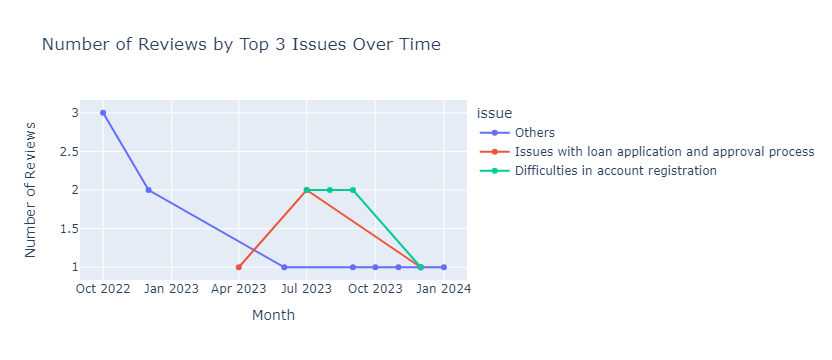

In [37]:
clean_app_responsiveness = preprocess(data, app_responsiveness)
plot_top_n_issues_time_series(clean_app_responsiveness, top_n=3)

Competition

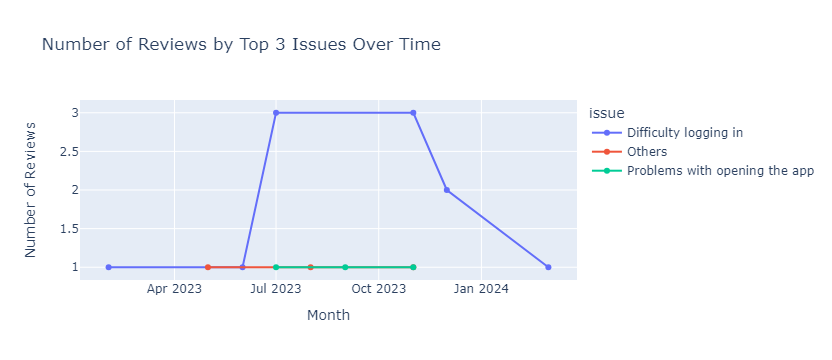

In [38]:
clean_competition = preprocess(data, competition)
plot_top_n_issues_time_series(clean_competition, top_n=3)

Credit Card Usage

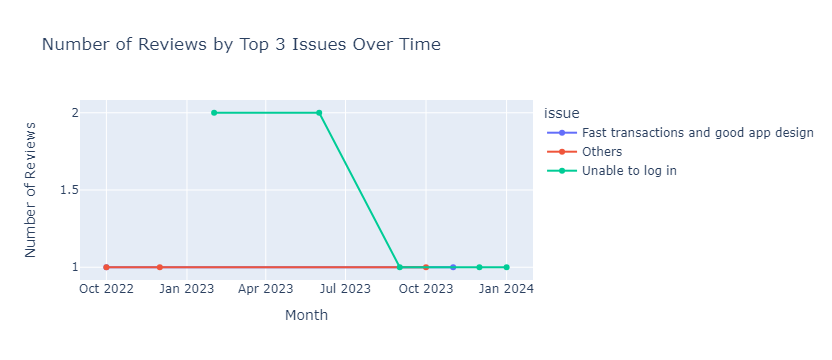

In [39]:
clean_credit_card = preprocess(data, credit_card)
plot_top_n_issues_time_series(clean_credit_card, top_n=3)

Customer Service

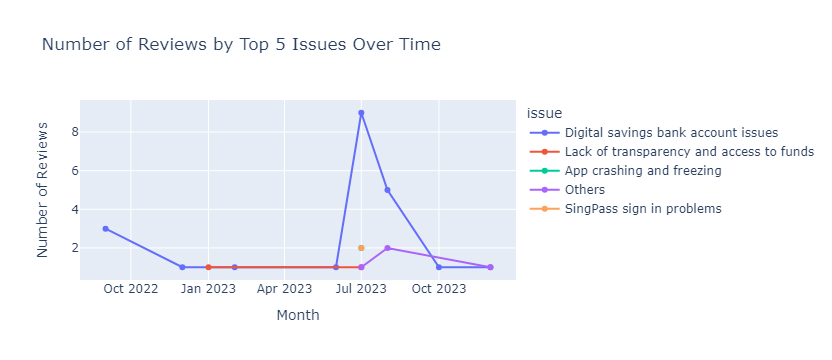

In [40]:
clean_customer_service = preprocess(data, customer_service)
plot_top_n_issues_time_series(clean_customer_service, top_n=5)

Customer Trust

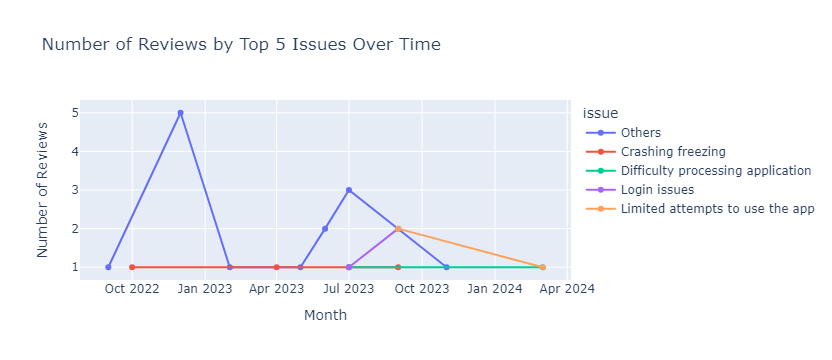

In [41]:
clean_customer_trust = preprocess(data, customer_trust)
plot_top_n_issues_time_series(clean_customer_trust, top_n=5)

Login & Account Setup

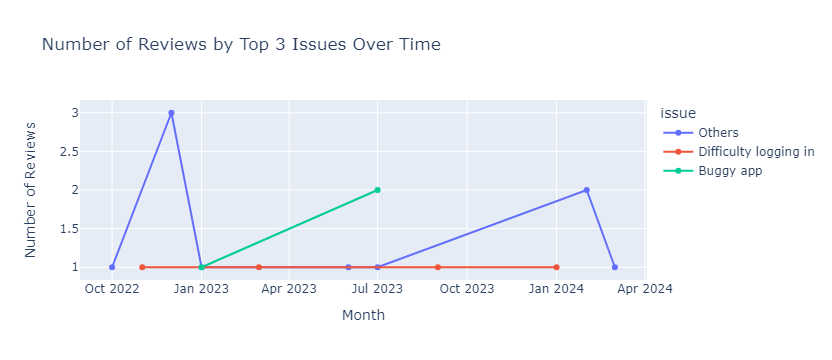

In [43]:
clean_login_account = preprocess(data, login_account)
plot_top_n_issues_time_series(clean_login_account, top_n=3)

Money Growth (Interest Rate)

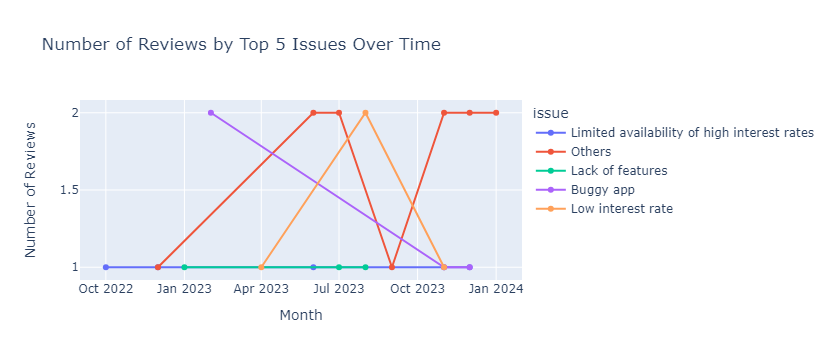

In [44]:
clean_money_growth = preprocess(data, money_growth)
plot_top_n_issues_time_series(clean_money_growth, top_n=5)

Safety

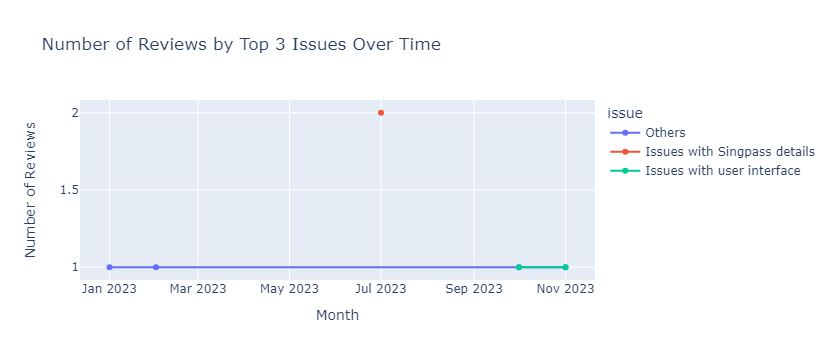

In [46]:
clean_safety = preprocess(data, safety)
plot_top_n_issues_time_series(clean_safety, top_n=3)

Services & Products

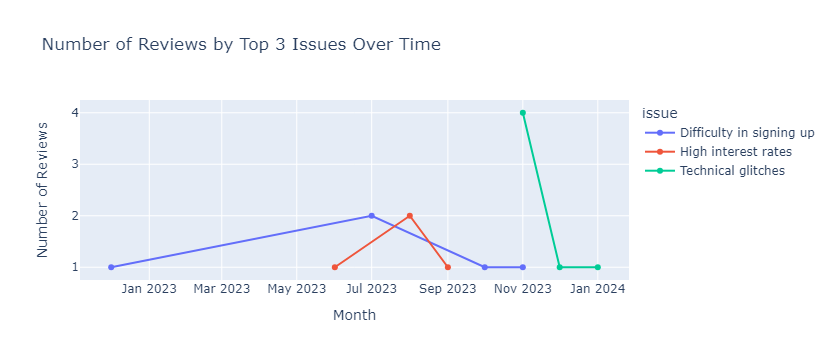

In [48]:
clean_service_products = preprocess(data, service_products)
plot_top_n_issues_time_series(clean_service_products, top_n=3)

User Interface

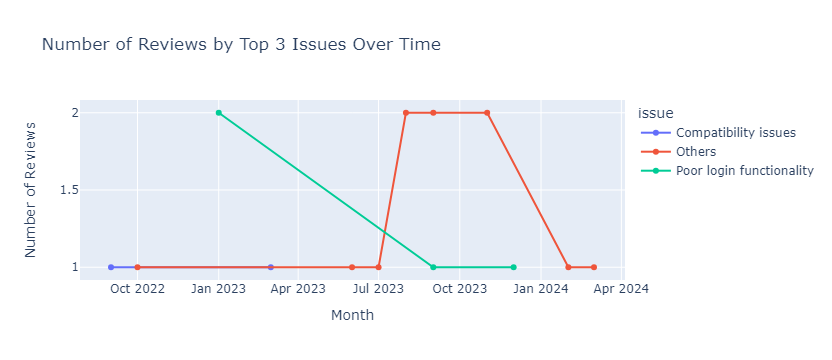

In [50]:
clean_user_interface = preprocess(data, user_interface)
plot_top_n_issues_time_series(clean_user_interface, top_n=3)